In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from ACAgraphML.Dataset import ZINC_Dataset

NUM_NODE_FEATS = 28
NUM_EDGE_FEATS = 4
trainDataset = ZINC_Dataset.SMALL_TRAIN.load()
valDataset = ZINC_Dataset.SMALL_VAL.load()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from ACAgraphML.Transforms import SteadyStateTransform, OneHotEncodeFeat
from ACAgraphML.Pipeline import DataAugmenter
from torch_geometric.transforms import AddRandomWalkPE

oneHotEncodeFeatTransform = OneHotEncodeFeat(nClasses=NUM_NODE_FEATS)
steadyStateTransform = SteadyStateTransform(useEdgeWeights=False)
randomWalkPETransform = AddRandomWalkPE(walk_length=5, attr_name=None)

dataAugmenter = DataAugmenter(
    dataset=trainDataset,
    transforms=[
        oneHotEncodeFeatTransform,
        steadyStateTransform,
        randomWalkPETransform,
        ]
)
trainDataset_aug = dataAugmenter.augment()
trainDataset_aug.data.x.shape

Applying transforms:   0%|          | 0/10000 [00:00<?, ?it/s]

c:\Polimi\Master\2Sem\ACA_GraphML_Project\.conda\Lib\site-packages\torch_geometric\data\in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


torch.Size([231664, 34])

Number of components to keep: 10
Explained variance ratio: 0.9923347234725952


torch.Size([231664, 10])

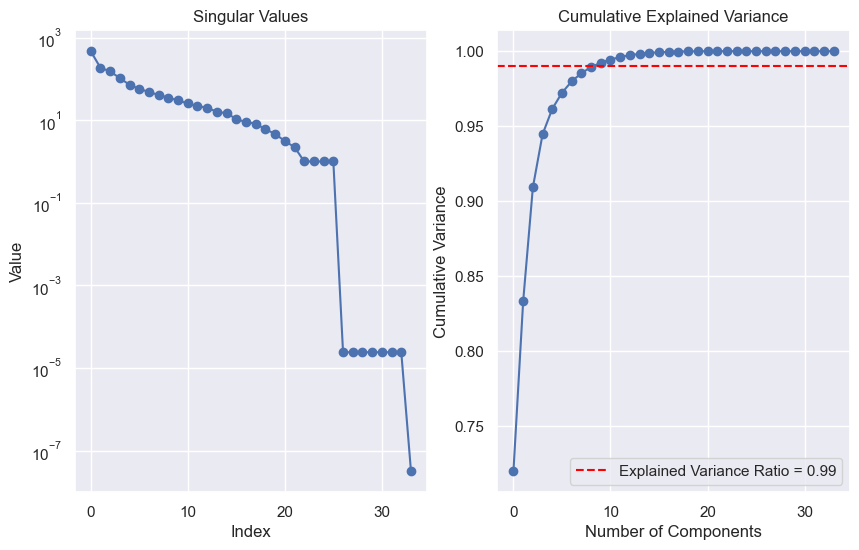

In [14]:
from ACAgraphML.Pipeline import DimentionalityReduction
dimentionalityReduction = DimentionalityReduction(explained_variance_ratio=0.99, verbose=True)
trainDataset_aug_dimRed = dimentionalityReduction(trainDataset_aug)

trainDataset_aug_dimRed.data.x.shape